<a href="https://colab.research.google.com/github/pszachew/Delivery-Prediction/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kontekst

Jesteśmy analitykami sklepu internetowego *eSzoppping* - sklepu internetowego z elektroniką oraz grami komputerowymi.

## Opis problemu

W związku ze zmiennymi czasami dostaw produktów przez firmy kurierskie nie jesteśmy w stanie dokładnie podać klientom przewidywanego czasu dostawy.

## Oczekiwania

Stworzenie modelu pozwalającego przewidywać czas dostawy danego produktu do klienta. Przekazywanie takich danych przy zakupie poprawiłoby atrakcyjność serwisu.

# Słownik dziedziny problemu



*   klient/użytkownik - osoba korzystająca ze sklepu
*   sesja - okres obejmujący korzystanie przez danego użytkownika sklepu w danym okresie
*   dostawca - firma realizująca dostawę produktu do klienta

# Problem biznesowy

Przewidywanie czasu potrzebnego na dostarczenie produktu klientowi.

## Biznesowe kryterium sukcesu

Przewidywania dostarczane przez model powinny jak najrzadziej się mylić, a nawet jeśli pomyłka wystąpi to nie powinna być znacząca.

# Zadanie modelowania

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
deliveries = pd.read_json('https://raw.githubusercontent.com/pszachew/Delivery-Prediction/master/data/deliveries.jsonl', lines=True)

In [3]:
sessions = pd.read_json('https://raw.githubusercontent.com/pszachew/Delivery-Prediction/master/data/sessions.jsonl', lines=True)

In [4]:
products = pd.read_json('https://raw.githubusercontent.com/pszachew/Delivery-Prediction/master/data/products.jsonl', lines=True)

In [5]:
users = pd.read_json('https://raw.githubusercontent.com/pszachew/Delivery-Prediction/master/data/users.jsonl', lines=True)

In [6]:
deliveries.head()

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2021-03-13T15:20:42,2021-03-15T09:02:35.781897,516
1,20002,2021-07-05T05:38:05,2021-07-06T13:03:11.690276,516
2,20003,2021-08-10T02:55:17,2021-08-12T08:10:38.305541,620
3,20004,2021-06-11T17:55:59,2021-06-14T08:25:06.664179,620
4,20005,2021-05-12T17:45:11,2021-05-15T09:13:13.350646,620


In [7]:
sessions.head()

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,124,2021-03-13 15:14:51,102,1035,VIEW_PRODUCT,5,NaN
1,124,2021-03-13 15:16:00,102,1067,VIEW_PRODUCT,5,NaN
2,124,2021-03-13 15:20:42,102,1067,BUY_PRODUCT,5,20001.0
3,125,2021-01-30 15:58:37,102,1067,VIEW_PRODUCT,0,NaN
4,126,2021-07-05 05:36:36,102,1001,VIEW_PRODUCT,0,NaN


In [8]:
products.head()

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99


In [9]:
users.head()

,user_id,name,city,street
0,102,Przemysław Hinca,Poznań,ul. Jana Sobieskiego 052
1,103,Alex Majnusz,Radom,ulica Krzywa 589
2,104,Dominik Jeske,Gdynia,pl. Zwycięstwa 75/14
3,105,Kaja Pielka,Wrocław,ul. Kusocińskiego 80
4,106,Marika Budzich,Wrocław,aleja Borowa 77


In [13]:
deliveries['delivery_timestamp'] = deliveries['delivery_timestamp'].apply(lambda x: pd.to_datetime(x))
deliveries['purchase_timestamp'] = deliveries['purchase_timestamp'].apply(lambda x: pd.to_datetime(x))

In [21]:
deliveries['diff_date'] = deliveries['delivery_timestamp'] - deliveries['purchase_timestamp']
deliveries['diff_date'] = deliveries['diff_date'].apply(lambda x: (x.total_seconds()/(60*60*24)))

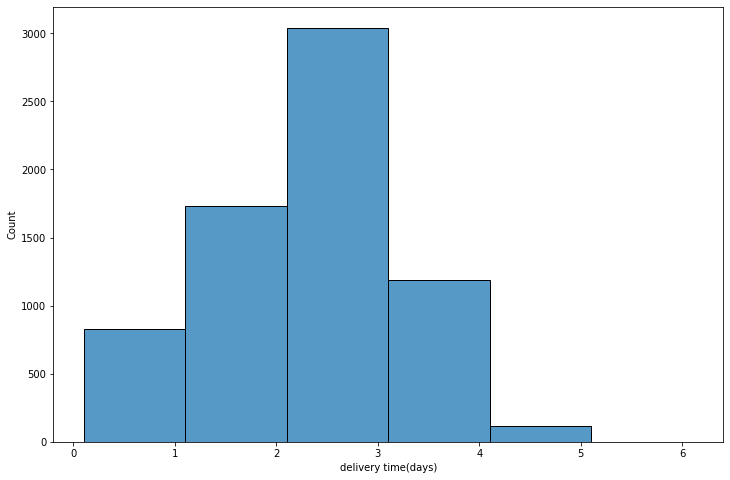

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(data=deliveries, x='diff_date', binwidth=1)
plt.xlabel("delivery time(days)")
plt.show()

In [11]:
sessions = sessions[sessions['event_type'] == 'BUY_PRODUCT']

In [15]:
deliveries['month'] = deliveries['delivery_timestamp'].apply(lambda x: x.month)

#BRAK MIESIĘCY DLA LISTOPADA I GRUDNIA

In [20]:
deliveries['month'].describe()

count    6901.000000
mean        5.544269
std         2.849453
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: month, dtype: float64

In [46]:
all_info = deliveries.merge(sessions.merge(products, on='product_id', how='left'), on='purchase_id', how='left')
all_info = all_info.merge(users, on='user_id', how='left')

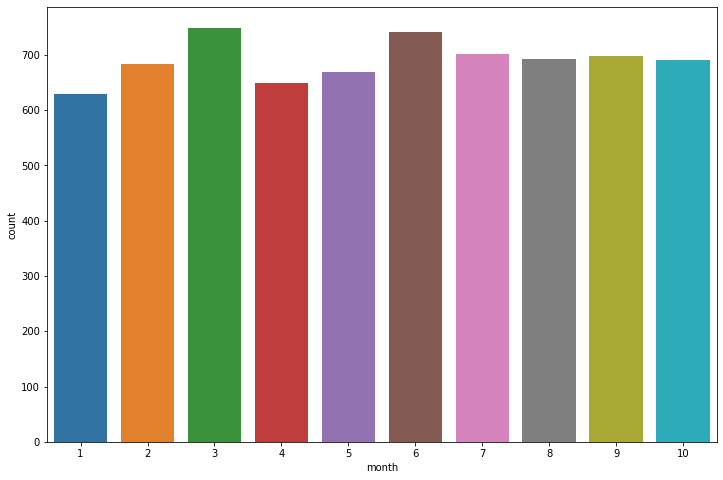

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(data=all_info, x='month')
plt.show()

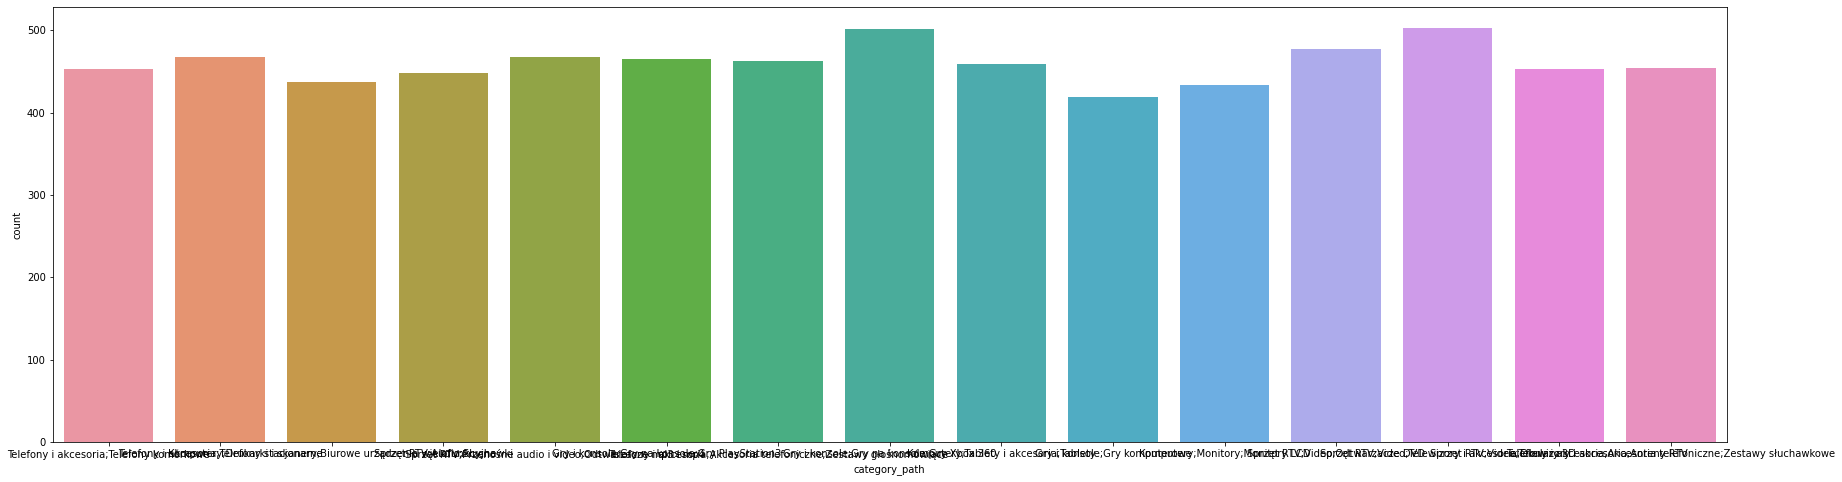

In [35]:
plt.figure(figsize=(30,8))
sns.countplot(data=all_info, x='category_path')
plt.show()

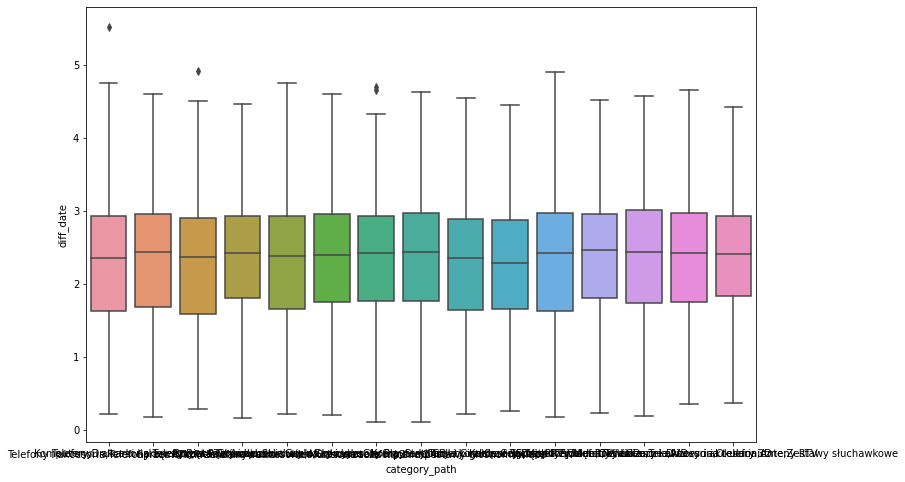

In [40]:
plt.figure(figsize=(12,8))
sns.boxplot(data=all_info, x='category_path', y='diff_date')
plt.show()

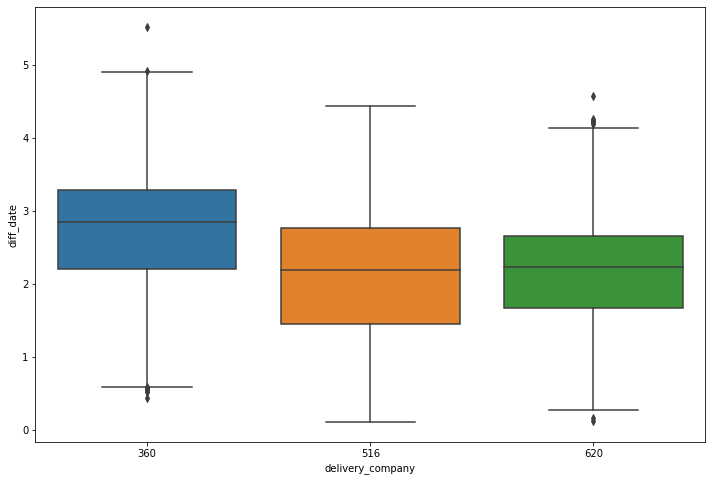

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(data=all_info, x='delivery_company', y='diff_date')
plt.show()

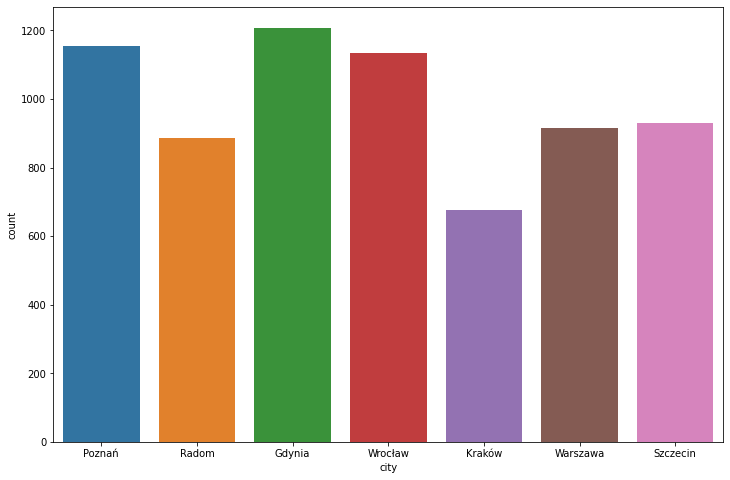

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(data=all_info, x='city')
plt.show()

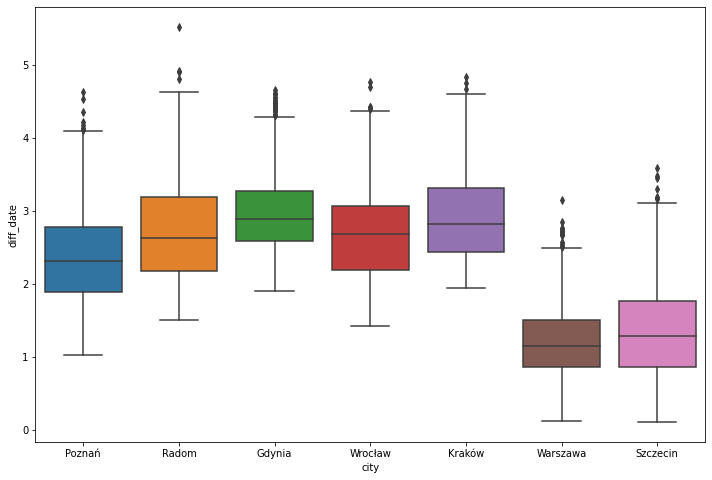

In [48]:
plt.figure(figsize=(12,8))
sns.boxplot(data=all_info, x='city', y='diff_date')
plt.show()